## Step 1: Setup 
Install the required imports and make sure the cell below runs successfully

In [4]:
import numpy as np  # used for handling mathematical operations easier in python
import tensorflow as tf  # used for creating and training machine learning models 
from tensorflow import keras # Keras contains the mnist dataset
from matplotlib import pyplot as plt  # library that helps us visualize data by creating plots 
import seaborn as sn # visualization library for creating more complex graphs

In [3]:
# split the data into a training set and testing set
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

The graph represents a 4


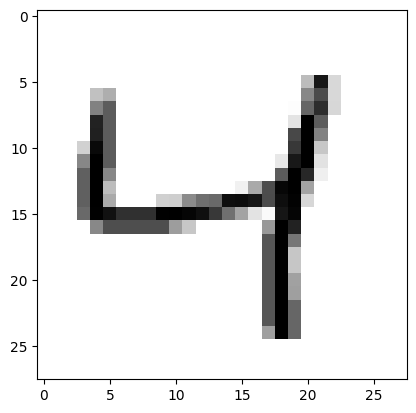

In [15]:
# split the data into a training set and testing set
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# what exactly does the data look like? 
x_train[0]
# each image is represented by a 2d array that is 28 by 28. Each number in the array is between 0 and 255. 0 Represents white and 255 is the darkest shade of black

# Now we want to make all of these values between 0 and 1 so we divide x_train and x_test by 255

x_train = x_train/255
x_test = x_test/255

# lets actually see what this character looks like 

# change the index value to see more values 
index = 2

plt.imshow(x_train[index],cmap = plt.cm.binary ) # this line plots all of the values in the 2d array along with their shades 
print(f'The graph represents a {y_train[index]}') # we also print the actual value that the plot is representing 


# so we can see that y_train is 5 and the image produced kind of looks like a 5 



In [20]:
# now that we understand the data, the goal is to train the model so that given a handwriting image, we can accurately predict
# the number that is represented by the image

# Flatten our data

x_train_flat = x_train.reshape(len(x_train), (28*28))
x_test_flat = x_test.reshape(len(x_test), (28*28))

In [21]:
# Model creation
model = keras.Sequential([
    keras.layers.Dense(128, input_shape = (784,),activation='relu'), 
    keras.layers.Dense(64, activation='sigmoid'), 
    keras.layers.Dense(32, activation='sigmoid'), 
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile (
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


model.fit(x_train_flat, y_train, epochs = 5)

/Users/lakebradford/Desktop/Machine-learning-demo/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 902us/step - accuracy: 0.8100 - loss: 0.9124
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - accuracy: 0.9624 - loss: 0.1381
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 864us/step - accuracy: 0.9766 - loss: 0.0838
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 897us/step - accuracy: 0.9836 - loss: 0.0575
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 880us/step - accuracy: 0.9877 - loss: 0.0437


In [22]:
# now we can test our model against our test data to see how well it performs 
model.evaluate(x_test_flat, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.9730 - loss: 0.0869


[0.07559410482645035, 0.9765999913215637]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step


<Axes: >

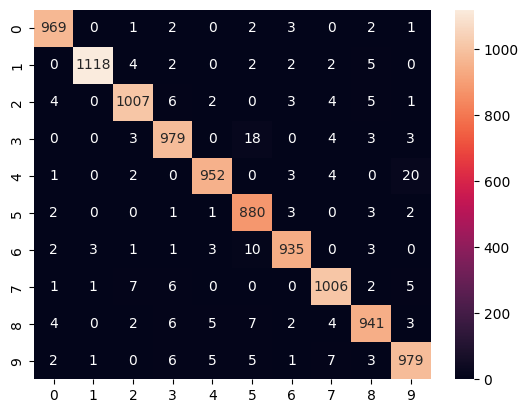

In [23]:
# we have a very high accuracy but lets create a neural network to see how well the model performs for each character

y_pred = model.predict(x_test_flat)
y_pred_labels = [np.argmax(i) for i in y_pred]

confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions = y_pred_labels)
sn.heatmap(confusion_matrix,annot=True, fmt= 'd')

What is this heatmap telling us? 
- Shows us correlations in the data
- For example in the very top right, we have 969 at 0,0. This means that there were 969 successful predictions where 0 was identified as 0 
- we can also see that there were 4 predictions where 0 was incorrectly identified as a 4 at 0,2
- You want the largest values of the heatmap to be in the diagonal like we have here 
